In [1]:
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def settings_plot(ax):
    for label in ax.get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

sizeOfFont=18
ticks_font = font_manager.FontProperties(size=sizeOfFont)

sizefigs_L=(16,8)

In [2]:
import pandas as pd
import seaborn as sns
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data=pd.read_csv('Data/processed_data_main.csv')
data=data.set_index(['owner__participant__code','owner__round_number'])
data['highrisk']=np.where(data.owner__crash_probability==0.05,0.05,0.02)
data['highscore']=np.where(data.FinScore>=data.FinScore.mean(),1,0)

reg1=PanelOLS.from_formula('owner__exit_price~1+EntityEffects',
                          data=data[data.owner__exit_price>0]).fit()
data['resid']=reg1.resids

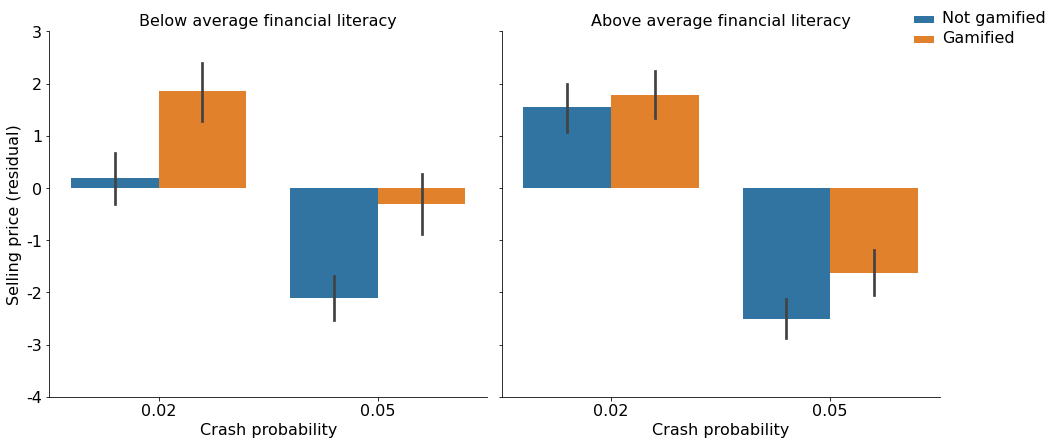

In [4]:
gs = gridspec.GridSpec(1, 1)


g=sns.catplot(data=data, kind='bar', y='resid', hue='owner__gamified', x='highrisk',col='highscore',
              height=6,aspect=1.1,legend=False)
axes=g.axes.flatten()
axes[0].set_title('Below average financial literacy', fontsize=16)
axes[0].set_xlabel('Crash probability', fontsize=16)
axes[1].set_title('Above average financial literacy', fontsize=16)
axes[1].set_xlabel('Crash probability', fontsize=16)
plt.title("Above average financial literacy",fontsize=16)
axes[0].set_ylabel('Selling price (residual)', fontsize=16)
plt.xlabel('Crash probability',fontsize=16)
#g.add_legend(title='',fontsize=16)
g.add_legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
new_labels = ['Not gamified', 'Gamified']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_title("")    
#g.set_yticklabels(g.get_yticks(), size = 15)
g.set_xticklabels([0.02,0.05], fontsize=16)
g.set_yticklabels([-4,-3,-2,-1,0,1,2,3], fontsize=16)
plt.setp(g._legend.get_texts(), fontsize='16') # for legend text
plt.savefig('experiment_fig.png',bbox_inches='tight')

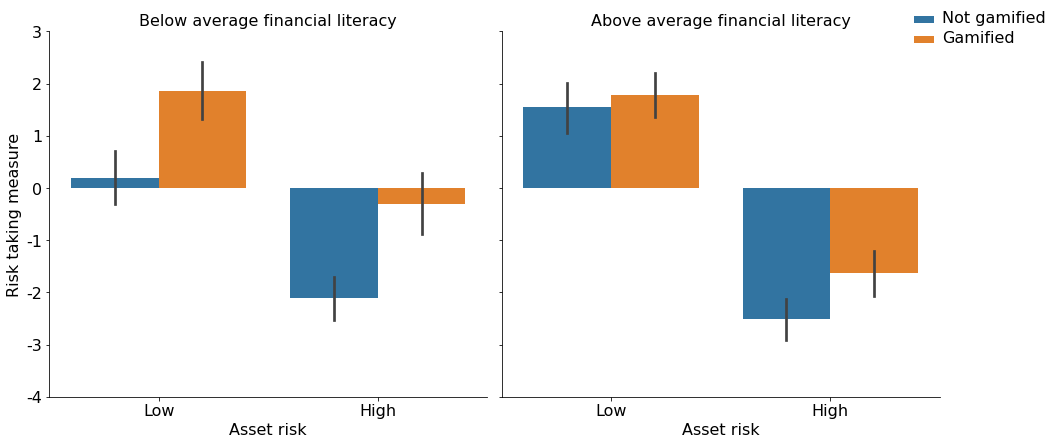

In [5]:
gs = gridspec.GridSpec(1, 1)


g=sns.catplot(data=data, kind='bar', y='resid', hue='owner__gamified', x='highrisk',col='highscore',
              height=6,aspect=1.1,legend=False)
axes=g.axes.flatten()
axes[0].set_title('Below average financial literacy', fontsize=16)
axes[0].set_xlabel('Asset risk', fontsize=16)
axes[0].set_xticklabels(['Low','High'], fontsize=16)
axes[1].set_title('Above average financial literacy', fontsize=16)
axes[1].set_xlabel('Asset risk', fontsize=16)
axes[1].set_xticklabels(['Low','High'], fontsize=16)
plt.title("Above average financial literacy",fontsize=16)
axes[0].set_ylabel('Risk taking measure', fontsize=16)
plt.xlabel('Asset risk',fontsize=16)
#g.add_legend(title='',fontsize=16)
g.add_legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
new_labels = ['Not gamified', 'Gamified']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_title("")
#g.set_yticklabels(g.get_yticks(), size = 15)
g.set_xticklabels(["Low","High"], fontsize=16)
g.set_yticklabels([-4,-3,-2,-1,0,1,2,3], fontsize=16)
plt.setp(g._legend.get_texts(), fontsize='16') # for legend text
plt.savefig('experiment_fig_v2.png',bbox_inches='tight')

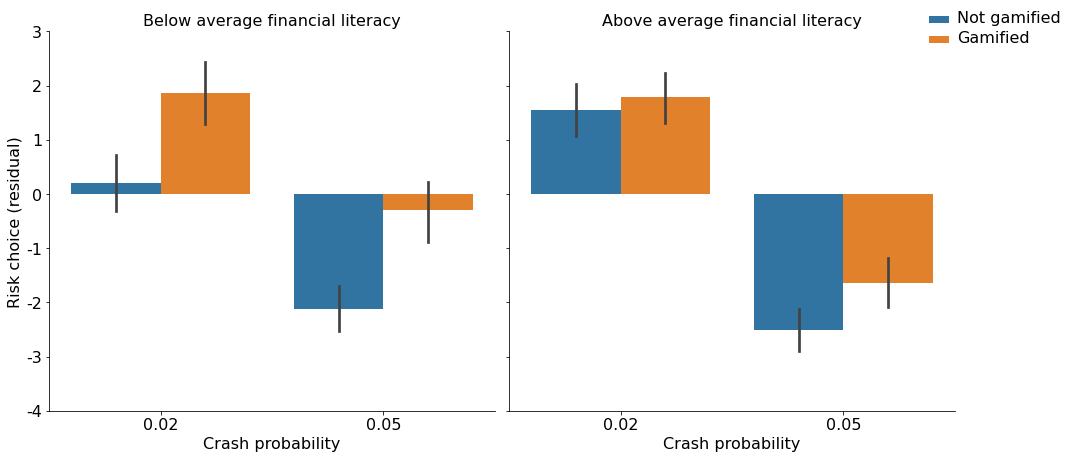

In [21]:
gs = gridspec.GridSpec(1, 1)


g=sns.catplot(data=data, kind='bar', y='resid', hue='owner__gamified', x='highrisk',col='highscore',
              height=6,aspect=1.1,legend=False)
axes=g.axes.flatten()
axes[0].set_title('Below average financial literacy', fontsize=16)
axes[0].set_xlabel('Crash probability', fontsize=16)
axes[1].set_title('Above average financial literacy', fontsize=16)
axes[1].set_xlabel('Crash probability', fontsize=16)
plt.title("Above average financial literacy",fontsize=16)
axes[0].set_ylabel('Risk choice (residual)', fontsize=16)
plt.xlabel('Crash probability',fontsize=16)
#g.add_legend(title='',fontsize=16)
g.add_legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
new_labels = ['Not gamified', 'Gamified']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_title("")    
#g.set_yticklabels(g.get_yticks(), size = 15)
g.set_xticklabels([0.02,0.05], fontsize=16)
g.set_yticklabels([-4,-3,-2,-1,0,1,2,3], fontsize=16)
plt.setp(g._legend.get_texts(), fontsize='16') # for legend text
plt.savefig('experiment_fig_RT.jpeg',bbox_inches='tight')